# Communities and Crime Dataset

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Communities and Crime Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Communities and Crime/data/communities.data')
data = pd.DataFrame(dataset)

#Using Simple Imputer to impute '#######' dates
imp = SimpleImputer(missing_values='?',strategy="most_frequent")
data = imp.fit_transform(data)

X = data[:, 0:127]
Y = data[:, 127]

print(data)
print(X.shape)
print(Y.shape)

[[53 '3' '1000' ... 0.0 '0.12' 0.67]
 [24 '3' '1000' ... 0.0 '0.12' 0.43]
 [34 '5' '81440' ... 0.0 '0.12' 0.12]
 ...
 [9 '9' '80070' ... 0.91 '0.28' 0.23]
 [25 '17' '72600' ... 0.22 '0.18' 0.19]
 [6 '3' '1000' ... 1.0 '0.13' 0.48]]
(1993, 127)
(1993,)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 128 entries, 8 to 0.2.2
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
print(X)

[[53 '3' '1000' ... '0' 0.0 '0.12']
 [24 '3' '1000' ... '0' 0.0 '0.12']
 [34 '5' '81440' ... '0' 0.0 '0.12']
 ...
 [9 '9' '80070' ... '0' 0.91 '0.28']
 [25 '17' '72600' ... '0' 0.22 '0.18']
 [6 '3' '1000' ... '0.5' 1.0 '0.13']]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressor']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(50,30,10), activation='relu')]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 48.592366498262564
Accuracy for DecisionTreeRegressor: 34.94407981093774
Accuracy for RandomForestRegressor: 58.61565830240666
Accuracy for AdaBoostRegressor: 47.40039518770981
Accuracy for GaussianProcessRegressor: 66.51665101543006
Accuracy for LinearRegression: 66.57512024882107
Accuracy for MLPRegressor: 43.59921559028972


Text(0.5, 1.0, 'Communities and Crime Dataset model accuracy')

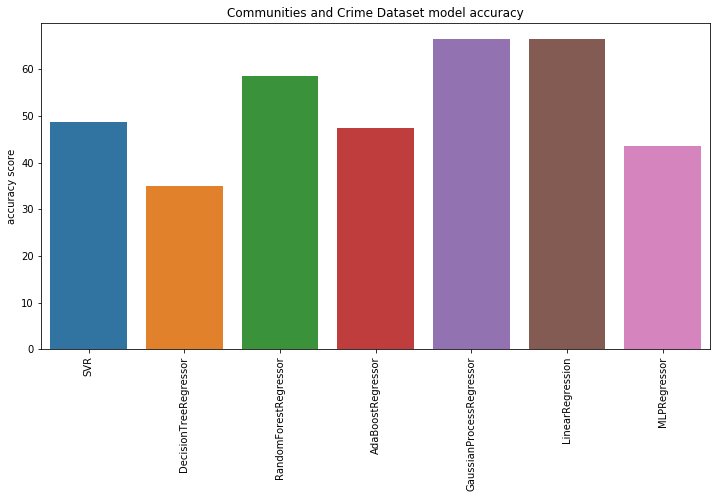

In [11]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Communities and Crime Dataset model accuracy')